In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from tdc.single_pred import ADME
from DeepPurpose import utils, CompoundPred
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn import metrics
from sklearn.metrics import f1_score, recall_score, roc_auc_score, precision_score
import matplotlib.pyplot as plt
from tdc.single_pred import ADME

In [2]:
from tdc.single_pred import ADME
adme = ADME(name='BBB_Martins')
balanced_data = adme.balanced(oversample=True, seed=42)
X, y = balanced_data['Drug'], balanced_data['Y']

Downloading...
100%|██████████| 138k/138k [00:00<00:00, 196kiB/s]  
Loading...
Done!
 Oversample of minority class is used. 


In [3]:
X_morgan = [AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smiles), 2, nBits=1024) for smiles in X]
X_morgan_np = np.array([np.array(fp) for fp in X_morgan])
# 데이터 분할: 학습 및 테스트 세트
X_train, X_test, y_train, y_test = train_test_split(X_morgan_np, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Cross-validation을 위한 fold 개수와 반복 횟수 설정
num_folds = 5
num_repeats = 10

# Cross-validation을 반복하여 각 반복에서의 점수를 저장할 리스트 생성
cv_acc_scores = []
cv_precision_scores = []
cv_recall_scores = []
cv_f1_scores = []
cv_roc_auc_scores = []

# 각 반복에서의 점수를 저장할 리스트 생성
all_acc_scores = []
all_precision_scores = []
all_recall_scores = []
all_f1_scores = []
all_roc_auc_scores = []

[13:19:49] WARNING: not removing hydrogen atom without neighbors
[13:19:49] WARNING: not removing hydrogen atom without neighbors
[13:19:49] WARNING: not removing hydrogen atom without neighbors
[13:19:49] WARNING: not removing hydrogen atom without neighbors
[13:19:49] WARNING: not removing hydrogen atom without neighbors
[13:19:49] WARNING: not removing hydrogen atom without neighbors
[13:19:49] WARNING: not removing hydrogen atom without neighbors
[13:19:49] WARNING: not removing hydrogen atom without neighbors
[13:19:49] WARNING: not removing hydrogen atom without neighbors
[13:19:49] WARNING: not removing hydrogen atom without neighbors
[13:19:49] WARNING: not removing hydrogen atom without neighbors
[13:19:49] WARNING: not removing hydrogen atom without neighbors
[13:19:49] WARNING: not removing hydrogen atom without neighbors
[13:19:49] WARNING: not removing hydrogen atom without neighbors
[13:19:49] WARNING: not removing hydrogen atom without neighbors
[13:19:49] WARNING: not r

In [4]:
# 반복적으로 cross-validation 수행
for i in range(num_repeats):
    
    # KFold 객체를 생성하여 데이터를 섞고 나누는 인덱스 생성
    kf = KFold(n_splits=num_folds, shuffle=True)
    
    # 모델 정의
    model = svm.SVC(kernel='rbf', random_state=42)
    
    acc_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy', n_jobs=-1)
    precision_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='precision', n_jobs=-1)
    recall_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='recall', n_jobs=-1)
    f1_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1', n_jobs=-1)
    roc_auc_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc', n_jobs=-1)

    cv_acc_scores.append(acc_scores.mean())
    cv_precision_scores.append(precision_scores.mean())
    cv_recall_scores.append(recall_scores.mean())
    cv_f1_scores.append(f1_scores.mean())
    cv_roc_auc_scores.append(roc_auc_scores.mean())

    all_acc_scores.append(acc_scores)
    all_precision_scores.append(precision_scores)
    all_recall_scores.append(recall_scores)
    all_f1_scores.append(f1_scores)
    all_roc_auc_scores.append(roc_auc_scores)

In [5]:
np.savetxt('acc_scores_BBB.txt', all_acc_scores)
np.savetxt('precision_scores_BBB.txt', all_precision_scores)
np.savetxt('recall_scores_BBB.txt', all_recall_scores)
np.savetxt('f1_scores_BBB.txt', all_f1_scores)
np.savetxt('roc_auc_scores_BBB.txt', all_roc_auc_scores)

# Cross-validation 점수의 평균 계산
mean_acc_score = np.mean(cv_acc_scores)
mean_precision_score = np.mean(cv_precision_scores)
mean_recall_score = np.mean(cv_recall_scores)
mean_f1_score = np.mean(cv_f1_scores)
mean_roc_auc_score = np.mean(cv_roc_auc_scores)

# Cross-validation 점수의 표준 편차 계산
std_dev_acc= np.std(cv_acc_scores)
std_dev_precision = np.std(cv_precision_scores)
std_dev_recall = np.std(cv_recall_scores)
std_dev_f1 = np.std(cv_f1_scores)
std_dev_roc_auc = np.std(cv_roc_auc_scores)

# 평균과 표준 편차 출력
print("평균 Cross-validation ACC:", mean_acc_score)
print("Cross-validation ACC 표준 편차:", std_dev_acc)

print("평균 Cross-validation Precision:", mean_precision_score)
print("Cross-validation Precision 표준 편차:", std_dev_precision)

print("평균 Cross-validation Recall:", mean_recall_score)
print("Cross-validation Recall 표준 편차:", std_dev_recall)

print("평균 Cross-validation F1 score:", mean_f1_score)
print("Cross-validation F1 score 표준 편차:", std_dev_f1)

print("평균 Cross-validation ROC-AUC:", mean_roc_auc_score)
print("Cross-validation ROC-AUC 표준 편차:", std_dev_roc_auc)

평균 Cross-validation ACC: 0.9397418381255275
Cross-validation ACC 표준 편차: 0.003358866397698646
평균 Cross-validation Precision: 0.9313235937801438
Cross-validation Precision 표준 편차: 0.0062799963220119374
평균 Cross-validation Recall: 0.9476736774505545
Cross-validation Recall 표준 편차: 0.002251461118932655
평균 Cross-validation F1 score: 0.9395628346785424
Cross-validation F1 score 표준 편차: 0.0026359982624636073
평균 Cross-validation ROC-AUC: 0.9762630224576652
Cross-validation ROC-AUC 표준 편차: 0.00170292472335704


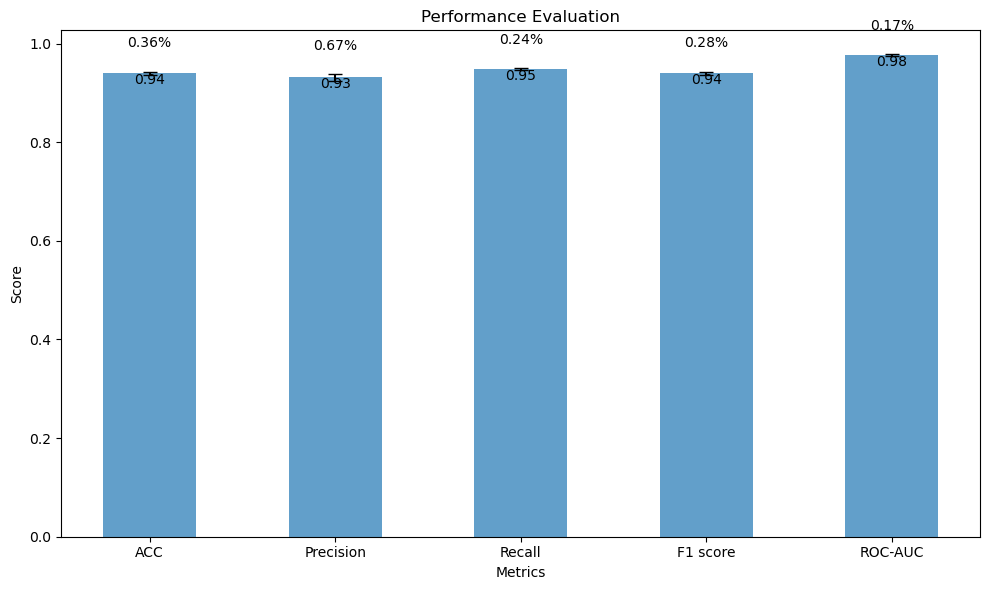

In [6]:
# 각 평가 지표의 평균과 표준 편차
mean_scores = [mean_acc_score, mean_precision_score, mean_recall_score, mean_f1_score, mean_roc_auc_score]
std_devs = [std_dev_acc, std_dev_precision, std_dev_recall, std_dev_f1, std_dev_roc_auc]

# 그래프에 표시할 평가 지표 이름
metrics = ['ACC', 'Precision', 'Recall', 'F1 score', 'ROC-AUC']

# 에러율 계산
error_values = [std_dev / mean_score for std_dev, mean_score in zip(std_devs, mean_scores)]

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 막대 그래프 그리기
bar = plt.bar(metrics, mean_scores, yerr=std_devs, capsize=5, alpha=0.7, width=0.5)

# 에러율 표시
for i in range(len(metrics)):
    plt.text(i, mean_scores[i] + std_devs[i] + 0.05, f'{error_values[i]*100:.2f}%', ha='center')
    
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, f'{height:.2f}', ha='center', va='top')

# 그래프 제목과 라벨 설정
plt.title('Performance Evaluation')
plt.xlabel('Metrics')
plt.ylabel('Score')

# 그래프 보이기
plt.tight_layout()
plt.show()